In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Создали Шум и Задали Уравнение Регрессии

In [231]:
X = 5 * np.random.rand(1000, 1)
y = 8 + 2*X + np.random.randn(1000, 1)

Text(0, 0.5, 'Y')

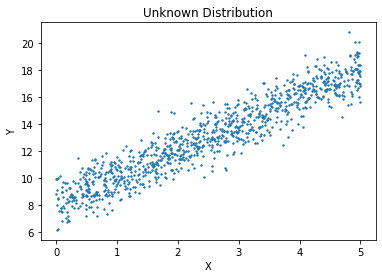

In [232]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y, color='tab:blue', s=2)
ax.set_title("Unknown Distribution")
ax.set_xlabel("X")
ax.set_ylabel("Y")

### Решили Уравнение Регрессии и Изобразили Полученное

In [233]:
X_b = np.c_[np.ones((1000, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta

array([[8.10138094],
       [1.97276172]])

In [234]:
X_new = np.array([[0], [5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
y_predict

array([[ 8.10138094],
       [17.96518955]])

Time 0.10085299200727604


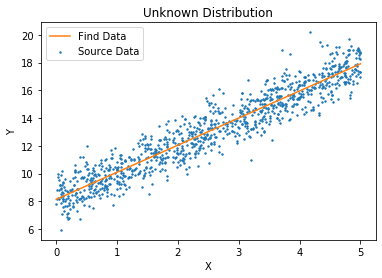

In [235]:
start_time = timeit.default_timer()

X = 5 * np.random.rand(1000, 1)
y = 8 + 2*X + np.random.randn(1000, 1)

X_b = np.c_[np.ones((1000, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y, color='tab:blue', s=2, label='Source Data')
ax.plot(X_new, y_predict, color='tab:orange', label='Find Data')
ax.set_title("Unknown Distribution")
ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")
print('Time',timeit.default_timer() - start_time)

### Градиентный Спуск

##### Через for

[[7.92742681]
 [2.01403919]]
Time 0.1717529830057174


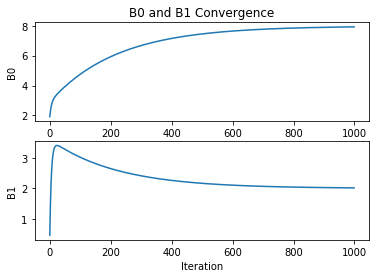

In [240]:
start_time = timeit.default_timer()

eta = 0.01
n_iterations = 1000
m = 1000 
theta = np.random.randn(2,1)
theta_tot = np.zeros((n_iterations,2))

X = 5 * np.random.rand(1000, 1)
y = 8 + 2*X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

for i in range(n_iterations):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * grad
    theta_tot[i,:] = theta.T

print(theta)

plt.subplot(2, 1, 1)
plt.plot(theta_tot[:,0])
plt.ylabel('B0')
plt.title('B0 and B1 Convergence')

plt.subplot(2, 1, 2)
plt.plot(theta_tot[:,1])
plt.xlabel('Iteration')
plt.ylabel('B1')
print('Time',timeit.default_timer() - start_time)

##### Через while

[[7.94498341]
 [2.03624938]] 1181
Time 0.43845259900263045


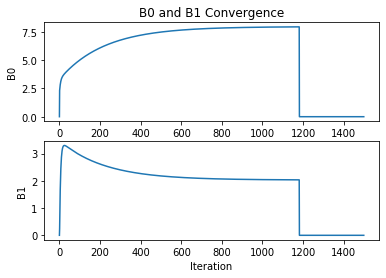

In [241]:
start_time = timeit.default_timer()

eta = 0.01  
m = 1000 
theta = np.random.randn(2,1)
theta_1 = np.array([[0],[0]])
theta_tot = np.zeros((1500,2))
i = 0

X = 5 * np.random.rand(1000, 1)
y = 8 + 2*X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

while abs(theta[0] - theta_1[0]) >= 0.0001:
    i = i + 1
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta_1 = theta
    theta = theta - eta * grad
    theta_tot[i,:] = theta.T
    
print(theta, i)

plt.subplot(2, 1, 1)
plt.plot(theta_tot[:,0])
plt.ylabel('B0')
plt.title('B0 and B1 Convergence')

plt.subplot(2, 1, 2)
plt.plot(theta_tot[:,1])
plt.xlabel('Iteration')
plt.ylabel('B1')
print('Time',timeit.default_timer() - start_time)

### Стохастический градиентный спуск

#### Через for

[[7.91160443]
 [2.03817282]]
Time 41.82363467299729


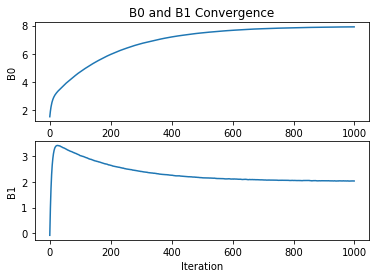

In [242]:
start_time = timeit.default_timer()

eta = 0.01
n_iterations = 1000
m = 1000 
theta_tot = np.zeros((n_iterations, 2))
theta = np.random.randn(2,1)

X = 5 * np.random.rand(1000, 1)
y = 8 + 2*X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

for i in range(n_iterations):
    for s in range(m):
        rand = np.random.randint(0, m)
        X_s = X_b[rand].reshape(1, X_b.shape[1])
        y_s = y[rand].reshape(1, 1)
        
        grad = 2/m * X_s.T.dot(X_s.dot(theta) - y_s)
        theta = theta - eta * grad
    theta_tot[i,:] = theta.T

print(theta)

plt.subplot(2, 1, 1)
plt.plot(theta_tot[:,0])
plt.ylabel('B0')
plt.title('B0 and B1 Convergence')

plt.subplot(2, 1, 2)
plt.plot(theta_tot[:,1])
plt.xlabel('Iteration')
plt.ylabel('B1')
print('Time',timeit.default_timer() - start_time)

#### Через while

[[7.92261619]
 [2.03282581]] 762 762000
Time 31.906335538995336


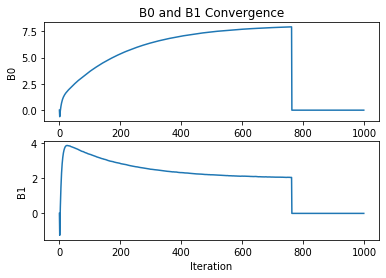

In [246]:
start_time = timeit.default_timer()

eta = 0.01
n_iterations = 1000
m = 1000 
theta_tot = np.zeros((1000, 2))
theta = np.random.randn(2,1)
theta_1 = np.array([[0],[0]])
j = 0
i = 0

X = 5 * np.random.rand(1000, 1)
y = 8 + 2*X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

while abs(theta[0] - theta_1[0]) >= 0.0001:
    i = i + 1 
    theta_1 = theta
    theta_tot[i,:] = theta.T
    for s in range(m):
        j = 1 + j
        rand = np.random.randint(0, m)
        X_s = X_b[rand].reshape(1, X_b.shape[1])
        y_s = y[rand].reshape(1, 1)
        
        grad = 2/m * X_s.T.dot(X_s.dot(theta) - y_s)
        theta = theta - eta * grad

print(theta, i, j)

plt.subplot(2, 1, 1)
plt.plot(theta_tot[:,0])
plt.ylabel('B0')
plt.title('B0 and B1 Convergence')

plt.subplot(2, 1, 2)
plt.plot(theta_tot[:,1])
plt.xlabel('Iteration')
plt.ylabel('B1')
print('Time',timeit.default_timer() - start_time)

### Мини-пакетный градиентный спуск

#### Через for

[[7.93013947]
 [2.03025579]]
Time 6.317632387988851


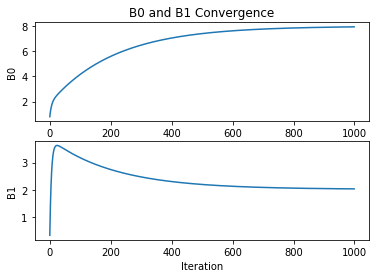

In [244]:
start_time = timeit.default_timer()

eta = 0.01
n_iterations = 1000
m = 1000 
bat = 20
theta = np.random.randn(2,1)
theta_tot = np.zeros((n_iterations,2))

X = 5 * np.random.rand(1000, 1)
y = 8 + 2*X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

for i in range(n_iterations):
    theta_tot[i,:] = theta.T
    np.random.permutation(X)
    np.random.permutation(y)
    for s in range(0, m, bat):
        X_ba = X[s:s+bat]
        y_ba = y[s:s+bat]
        X_bc = np.c_[np.ones((len(X_ba),1)), X_ba]
        
        grad = 2/m * X_bc.T.dot(X_bc.dot(theta) - y_ba)
        theta = theta - eta * grad

print(theta)

plt.subplot(2, 1, 1)
plt.plot(theta_tot[:,0])
plt.ylabel('B0')
plt.title('B0 and B1 Convergence')

plt.subplot(2, 1, 2)
plt.plot(theta_tot[:,1])
plt.xlabel('Iteration')
plt.ylabel('B1')
print('Time',timeit.default_timer() - start_time)

#### Через while

[[8.00071169]
 [2.01425813]] 1257 62850
Time 7.697852361990954


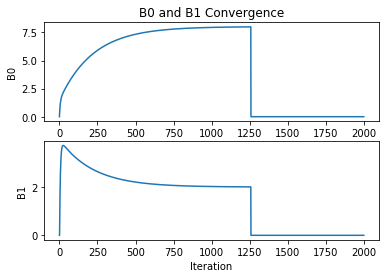

In [245]:
start_time = timeit.default_timer()

eta = 0.01
n_iterations = 1000
m = 1000 
bat = 20
theta = np.random.randn(2,1)
theta_tot = np.zeros((2000,2))
i = 0
j = 0

X = 5 * np.random.rand(1000, 1)
y = 8 + 2*X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

while abs(theta[0] - theta_1[0]) >= 0.0001:    
    i = i + 1 
    theta_1 = theta
    theta_tot[i,:] = theta.T
    np.random.permutation(X)
    np.random.permutation(y)
    for s in range(0, m, bat):
        j = j + 1
        X_ba = X[s:s+bat]
        y_ba = y[s:s+bat]
        X_bc = np.c_[np.ones((len(X_ba),1)), X_ba]
        
        grad = 2/m * X_bc.T.dot(X_bc.dot(theta) - y_ba)
        theta = theta - eta * grad

print(theta, i, j)

plt.subplot(2, 1, 1)
plt.plot(theta_tot[:,0])
plt.ylabel('B0')
plt.title('B0 and B1 Convergence')

plt.subplot(2, 1, 2)
plt.plot(theta_tot[:,1])
plt.xlabel('Iteration')
plt.ylabel('B1')
print('Time',timeit.default_timer() - start_time)

In [3]:
d = {'Gradient descent with for':pd.Series([7.927, 2.014, 0.178, 1000], 
                                           index=['theta0', 'theta1','Time, ns', 'learning epoch']),
     'Gradient descent with while':pd.Series([7.945, 2.036, 0.438, 1000], 
                                           index=['theta0', 'theta1','Time, ns', 'learning epoch']),
     'Stochastic gradient descent with for':pd.Series([7.911, 2.038, 41.824, 1000], 
                                                      index=['theta0', 'theta1','Time, ns', 'learning epoch']),
     'Stochastic gradient descent with while':pd.Series([7.923, 2.033, 31.906, 762], 
                                                       index=['theta0', 'theta1','Time, ns', 'learning epoch']),
     'Mini-Batch gradient descent with for (batch_size = 20)':pd.Series([7.930, 2.030, 6.318, 1000], 
                                                       index=['theta0', 'theta1','Time, ns', 'learning epoch']),
     'Mini-Batch gradient descent with while (batch_size = 20)':pd.Series([8.000, 2.014, 7.698 , 1257], 
                                                       index=['theta0', 'theta1','Time, ns', 'learning epoch']),
    }
Result = pd.DataFrame(d)
Result

Gradient descent with for  Gradient descent with while  \
theta0                              7.927                        7.945   
theta1                              2.014                        2.036   
Time, ns                            0.178                        0.438   
learning epoch                   1000.000                     1000.000   

                Stochastic gradient descent with for  \
theta0                                         7.911   
theta1                                         2.038   
Time, ns                                      41.824   
learning epoch                              1000.000   

                Stochastic gradient descent with while  \
theta0                                           7.923   
theta1                                           2.033   
Time, ns                                        31.906   
learning epoch                                 762.000   

                Mini-Batch gradient descent with for (batch_size = 20)  \
theta0                                                      7.930        
theta1                                                      2.030        
Time, ns                                                    6.318        
learning epoch                                           1000.000        

                Mini-Batch gradient descent with while (batch_size = 20)  
theta0                                                      8.000         
theta1                                                      2.014         
Time, ns                                                    7.698         
learning epoch                                           1257.000

Резульаты могут меняться при повторных запусках, но тенденция сохранится

In [4]:
Result.to_excel('Table_with_Results.xlsx')